Читаем и разбиваем датасет

In [1]:
import pandas as pd
import ChooseParams
import Graphics
from sklearn.model_selection import train_test_split

Читаем и разбиваем датасет

In [2]:
data = pd.read_csv('games_data.csv')

x = data.drop('Rating', axis=1).to_numpy()
y = data['Rating'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

Находим лучшие гиперпараметры для каждой модели

In [3]:
params = ChooseParams.ChooseParams(x_train, y_train, x_test, y_test, x_val, y_val)

best_params = params.choose_regression()

print("Regression")
print(f"Parameters: {best_params[0]}")
print(f"F1: {best_params[1]}")

best_params = params.choose_gd()

print("GradientDescend")
print(f"Parameters: {best_params[0]}")
print(f"F1: {best_params[1]}")

best_params = params.choose_swm()

print("SVM")
print(f"Parameters: {best_params[0]}")
print(f"F1: {best_params[1]}")

[I 2024-11-15 13:02:15,759] A new study created in memory with name: no-name-73e1800a-afc2-47d1-92fb-4290d57f0993
[I 2024-11-15 13:02:15,765] Trial 0 finished with value: 0.7288135593220338 and parameters: {'alpha': 0.456553954736847}. Best is trial 0 with value: 0.7288135593220338.
[I 2024-11-15 13:02:15,768] Trial 1 finished with value: 0.7288135593220338 and parameters: {'alpha': 0.8667923417362069}. Best is trial 0 with value: 0.7288135593220338.
[I 2024-11-15 13:02:15,771] Trial 2 finished with value: 0.7288135593220338 and parameters: {'alpha': 0.39050386919372126}. Best is trial 0 with value: 0.7288135593220338.
[I 2024-11-15 13:02:15,773] Trial 3 finished with value: 0.7288135593220338 and parameters: {'alpha': 0.3569184605861099}. Best is trial 0 with value: 0.7288135593220338.
[I 2024-11-15 13:02:15,775] Trial 4 finished with value: 0.7288135593220338 and parameters: {'alpha': 0.5040029043798695}. Best is trial 0 with value: 0.7288135593220338.
[I 2024-11-15 13:02:15,777] Tri

Regression
Parameters: {'alpha': 0.456553954736847}
F1: 0.7288135593220338


[I 2024-11-15 13:02:16,698] Trial 8 finished with value: 0.6832298136645962 and parameters: {'loss': 'exp', 'alpha': 0.019358754823763258, 'learning_rate': 0.7178606225635696, 'max_iter': 604, 'lambda1': 0.2740605710585783, 'lambda2': 0.4655506833989035}. Best is trial 1 with value: 0.6832298136645962.
[I 2024-11-15 13:02:16,722] Trial 9 finished with value: 0.6832298136645962 and parameters: {'loss': 'log', 'alpha': 0.9371714645529879, 'learning_rate': 0.6515170120446045, 'max_iter': 650, 'lambda1': 0.8345414512825698, 'lambda2': 0.6515394594312569}. Best is trial 1 with value: 0.6832298136645962.
[I 2024-11-15 13:02:16,762] Trial 10 finished with value: 0.6832298136645962 and parameters: {'loss': 'sigmoid', 'alpha': 0.7144647454815776, 'learning_rate': 0.5127395548578981, 'max_iter': 500, 'lambda1': 0.03182202397132938, 'lambda2': 0.9731372902647284}. Best is trial 1 with value: 0.6832298136645962.
[I 2024-11-15 13:02:16,820] Trial 11 finished with value: 0.6832298136645962 and param

GradientDescend
Parameters: {'loss': 'sigmoid', 'alpha': 0.6410560040428891, 'learning_rate': 0.69992441089947, 'max_iter': 504, 'lambda1': 0.19986396530337536, 'lambda2': 0.6921407084372971}
F1: 0.6832298136645962


[I 2024-11-15 13:02:29,280] Trial 0 finished with value: 0.5714285714285714 and parameters: {'kernel': 'linear', 'C': 1.6455231161635724, 'learning_rate': 0.4810580371122061, 'max_iter': 817}. Best is trial 0 with value: 0.5714285714285714.
[I 2024-11-15 13:02:32,522] Trial 1 finished with value: 0.6837606837606838 and parameters: {'kernel': 'rfb_0.3', 'C': 0.9871980976843959, 'learning_rate': 0.2933093203527843, 'max_iter': 644}. Best is trial 1 with value: 0.6837606837606838.
[I 2024-11-15 13:02:35,390] Trial 2 finished with value: 0.4536082474226804 and parameters: {'kernel': 'sigmoid_0.2_0.5', 'C': 1.2558622928601066, 'learning_rate': 0.6317169173264716, 'max_iter': 618}. Best is trial 1 with value: 0.6837606837606838.
[I 2024-11-15 13:02:38,009] Trial 3 finished with value: 0.5233644859813084 and parameters: {'kernel': 'linear', 'C': 1.2946485315346512, 'learning_rate': 0.8588563673857691, 'max_iter': 629}. Best is trial 1 with value: 0.6837606837606838.
[I 2024-11-15 13:02:40,950

SVM
Parameters: {'kernel': 'rfb_0.5', 'C': 0.907429170952446, 'learning_rate': 0.6488681537395506, 'max_iter': 859}
F1: 0.7288135593220338


Рисуем графики

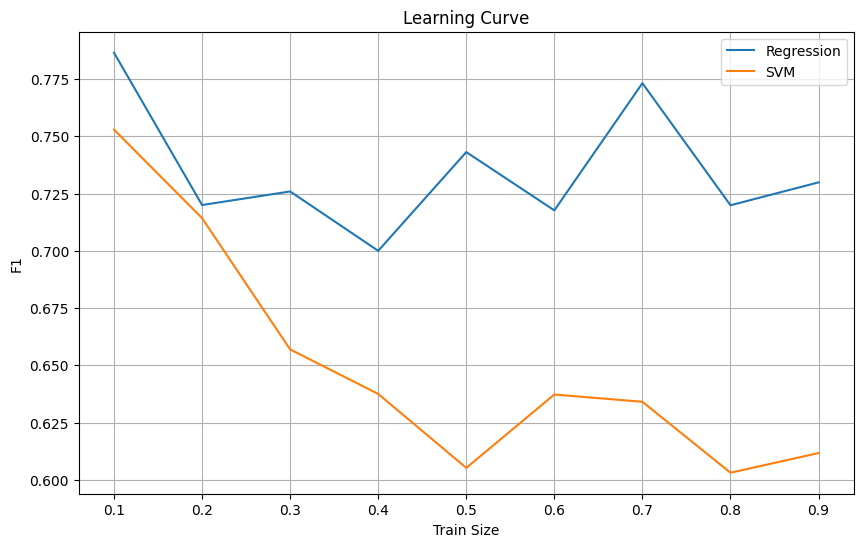

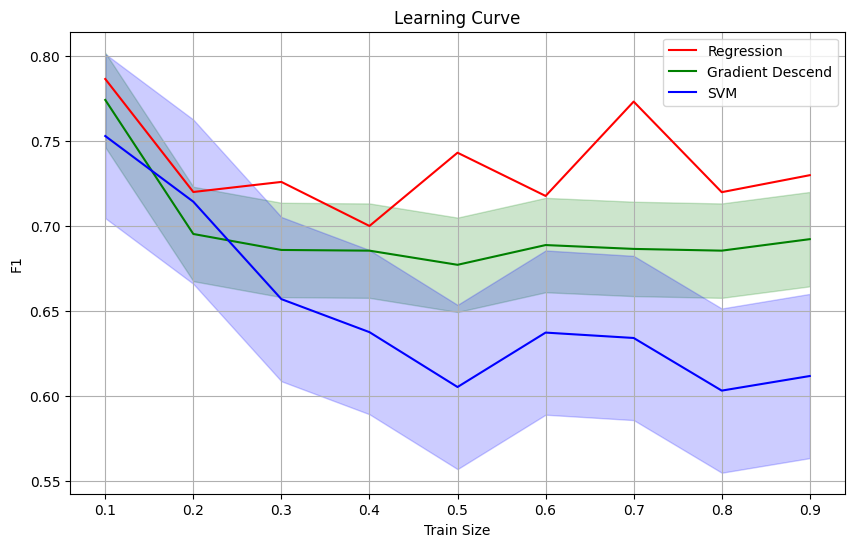

In [4]:
Graphics.draw(data)